In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
vocab_size = 7000
embedding_dim = 256
max_length = 20
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [4]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "while", "with", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]
punctuations = '''!()-[]{};:'"`\,<>./?@#$%^&*_~\n'''

In [5]:
category = []
subcategory = []
questions = []

with open('train_5500.label', 'r') as f:
    for line in f:
        split_index1 = line.index(":")
        split_index2 = line.index(" ")
        category.append(line[:split_index1])
        subcategory.append(line[split_index1+1:split_index2])
        questions.append(line[(split_index2+1):])
        
print(category[0])
print(subcategory[0])
print(questions[0:10])

DESC
manner
['How did serfdom develop in and then leave Russia ?\n', 'What films featured the character Popeye Doyle ?\n', "How can I find a list of celebrities ' real names ?\n", 'What fowl grabs the spotlight after the Chinese Year of the Monkey ?\n', 'What is the full form of .com ?\n', 'What contemptible scoundrel stole the cork from my lunch ?\n', "What team did baseball 's St. Louis Browns become ?\n", 'What is the oldest profession ?\n', 'What are liver enzymes ?\n', 'Name the scar-faced bounty hunter of The Old West .\n']


In [6]:
for i in range(0,len(questions)):
    question = questions[i].lower()
    for word in stopwords:
        token = " " + word + " "
        question = question.replace(token, " ")
    no_punct = ''
    for char in question:
        if char not in punctuations:
            no_punct = no_punct + char
    no_punct = no_punct.replace("  ", " ")
    questions[i] = no_punct

print(len(category))
print(len(questions))
print(questions[0:10])

5452
5452
['how serfdom develop leave russia ', 'what films featured character popeye doyle ', 'how can find list celebrities real names ', 'what fowl grabs spotlight chinese year monkey ', 'what full form com ', 'what contemptible scoundrel stole cork lunch ', 'what team baseball s st louis browns become ', 'what oldest profession ', 'what liver enzymes ', 'name scarfaced bounty hunter old west ']


In [7]:
test_category = []
test_subcategory = []
test_questions = []

with open('TREC_10.label', 'r') as f:
    for line in f:
        split_index1 = line.index(":")
        split_index2 = line.index(" ")
        test_category.append(line[:split_index1])
        test_subcategory.append(line[split_index1+1:split_index2])
        test_questions.append(line[(split_index2+1):])
        
print(test_category[0])
print(test_subcategory[0])
print(test_questions[0:10])

NUM
dist
['How far is it from Denver to Aspen ?\n', 'What county is Modesto , California in ?\n', 'Who was Galileo ?\n', 'What is an atom ?\n', 'When did Hawaii become a state ?\n', 'How tall is the Sears Building ?\n', 'George Bush purchased a small interest in which baseball team ?\n', "What is Australia 's national flower ?\n", 'Why does the moon turn orange ?\n', 'What is autism ?\n']


In [8]:
for i in range(0,len(test_questions)):
    test_question = test_questions[i].lower()
    for word in stopwords:
        token = " " + word + " "
        test_question = test_question.replace(token, " ")
    no_punct = ''
    for char in test_question:
        if char not in punctuations:
            no_punct = no_punct + char
    no_punct = no_punct.replace("  ", " ")
    test_questions[i] = no_punct

print(len(test_category))
print(len(test_questions))
print(test_questions[0:10])

500
500
['how far denver aspen ', 'what county modesto california ', 'who galileo ', 'what atom ', 'when hawaii become state ', 'how tall sears building ', 'george bush purchased small interest which baseball team ', 'what australia s national flower ', 'why moon turn orange ', 'what autism ']


In [9]:
train_questions = questions
train_category = category
train_subcategory = subcategory

validation_questions = test_questions
validation_category = test_category
validation_subcategory = test_subcategory

print(len(train_questions))
print(len(train_category))
print(len(validation_questions))
print(len(validation_category))

5452
5452
500
500


In [10]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_questions)
word_index = tokenizer.word_index
print(len(word_index))

train_sequences = tokenizer.texts_to_sequences(train_questions)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

8520
5
20
6
20


In [11]:
validation_sequences = tokenizer.texts_to_sequences(validation_questions)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

500
(500, 20)


In [12]:
category_tokenizer = Tokenizer()
category_tokenizer.fit_on_texts(category)

training_category_seq = pad_sequences(np.array(category_tokenizer.texts_to_sequences(train_category)), maxlen=1)
validation_category_seq = pad_sequences(np.array(category_tokenizer.texts_to_sequences(validation_category)), maxlen=1)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
#     tf.keras.layers.Conv1D(64, 5, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=3),    
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'sigmoid'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation = 'softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.002), metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 256)           1792000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                8224      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 1,800,455
Trainable params: 1,800,455
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 10
history = model.fit(train_padded, training_category_seq, epochs = num_epochs, validation_data=(validation_padded, validation_category_seq), verbose = 2)

Train on 5452 samples, validate on 500 samples
Epoch 1/10
5452/5452 - 12s - loss: 1.7788 - acc: 0.2474 - val_loss: 1.6439 - val_acc: 0.2680
Epoch 2/10
5452/5452 - 8s - loss: 1.3300 - acc: 0.5378 - val_loss: 1.1732 - val_acc: 0.5560
Epoch 3/10
5452/5452 - 8s - loss: 0.7530 - acc: 0.7927 - val_loss: 0.7656 - val_acc: 0.7960
Epoch 4/10
5452/5452 - 8s - loss: 0.4201 - acc: 0.9002 - val_loss: 0.5988 - val_acc: 0.8400
Epoch 5/10
5452/5452 - 9s - loss: 0.2566 - acc: 0.9373 - val_loss: 0.5403 - val_acc: 0.8300
Epoch 6/10
5452/5452 - 8s - loss: 0.1681 - acc: 0.9582 - val_loss: 0.4759 - val_acc: 0.8420
Epoch 7/10
5452/5452 - 8s - loss: 0.1154 - acc: 0.9752 - val_loss: 0.4818 - val_acc: 0.8580
Epoch 8/10
5452/5452 - 8s - loss: 0.0818 - acc: 0.9840 - val_loss: 0.4417 - val_acc: 0.8740
Epoch 9/10
5452/5452 - 8s - loss: 0.0594 - acc: 0.9901 - val_loss: 0.4394 - val_acc: 0.8760
Epoch 10/10
5452/5452 - 8s - loss: 0.0465 - acc: 0.9919 - val_loss: 0.4455 - val_acc: 0.8660


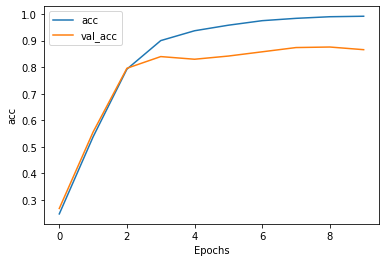

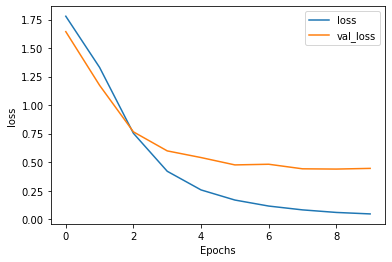

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [16]:
subcategory_tokenizer = Tokenizer()
subcategory_tokenizer.fit_on_texts(category)

training_subcategory_seq = pad_sequences(np.array(subcategory_tokenizer.texts_to_sequences(train_subcategory)), maxlen=1)
validation_subcategory_seq = pad_sequences(np.array(subcategory_tokenizer.texts_to_sequences(validation_subcategory)), maxlen=1)

In [17]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=3),    
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(7, activation = 'softmax')
])

model1.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 256)           1792000   
_________________________________________________________________
conv1d (Conv1D)              (None, 16, 64)            81984     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 64)             0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                

In [18]:
num_epochs = 10
history1 = model1.fit((train_padded, training_category_seq), training_subcategory_seq, epochs = num_epochs, validation_data=((validation_padded, validation_category_seq), validation_subcategory_seq), verbose = 2)

Train on 5452 samples, validate on 500 samples
Epoch 1/10
5452/5452 - 12s - loss: 0.3468 - acc: 0.9369 - val_loss: 0.0990 - val_acc: 0.9800
Epoch 2/10
5452/5452 - 10s - loss: 0.1584 - acc: 0.9514 - val_loss: 0.0804 - val_acc: 0.9840
Epoch 3/10
5452/5452 - 10s - loss: 0.0515 - acc: 0.9829 - val_loss: 0.0565 - val_acc: 0.9800
Epoch 4/10
5452/5452 - 10s - loss: 0.0162 - acc: 0.9949 - val_loss: 0.0641 - val_acc: 0.9780
Epoch 5/10
5452/5452 - 10s - loss: 0.0087 - acc: 0.9972 - val_loss: 0.0646 - val_acc: 0.9740
Epoch 6/10
5452/5452 - 10s - loss: 0.0046 - acc: 0.9985 - val_loss: 0.0651 - val_acc: 0.9800
Epoch 7/10
5452/5452 - 10s - loss: 0.0033 - acc: 0.9991 - val_loss: 0.0760 - val_acc: 0.9740
Epoch 8/10
5452/5452 - 10s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0737 - val_acc: 0.9800
Epoch 9/10
5452/5452 - 10s - loss: 6.2667e-04 - acc: 1.0000 - val_loss: 0.0795 - val_acc: 0.9760
Epoch 10/10
5452/5452 - 10s - loss: 0.0014 - acc: 0.9998 - val_loss: 0.0757 - val_acc: 0.9780


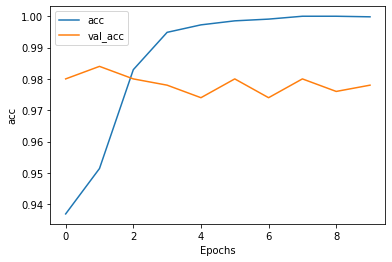

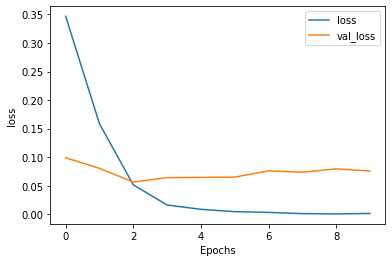

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history1, "acc")
plot_graphs(history1, "loss")